In [95]:
import pandas as pd
import numpy as np

# **Phase 1: Data Prep + Simulation + Feature Engineering.**

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
path ="/content/drive/MyDrive/Credit card dashboard/creditcard.csv"
df = pd.read_csv(path)

Look at column names and data types

In [98]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

Explore Dataset Structure

In [99]:
#Check number of rows and columns
num_rows = len(df.index)
num_col = len(df.columns)
print(f"Number of rows is {num_rows} \nNumber of colunms is {num_col}")

Number of rows is 284807 
Number of colunms is 31


Identify class imbalance

In [100]:
#Calculate how many fraud (Class = 1) and non-fraud (Class = 0) transactions there are.
count_fraud = df['Class'].sum()
count_legit = num_rows - count_fraud
print(f"we have {count_fraud} fraud and {count_legit} legit cases in the dataset")

we have 492 fraud and 284315 legit cases in the dataset


Understand Each Variable’s Role
Ask yourself:
*   What features are actionable or useful for visualizations?
*   Which ones are hard to interpret (e.g., PCA components)?
*   Is Time interpretable as-is, or do you need to convert it (e.g., to hours)?

Plan for Feature Simulation
Since the original dataset lacks:
- transaction_type (e.g., Online, ATM, POS)
- region (e.g., North, South, East, West)

How to simulate them:
- Choose 3–5 transaction types.
- Choose 4–6 region names or locations (could be cities, states, or fake zones).

In [101]:
#The dataset lacks certain real-world details you’d expect in a banking or retail fraud context.
#So simulate the following fields:
#Decide on a set of 3–5 realistic transaction types
  #Example types: Online, In-store POS, ATM Withdrawal, Wire Transfer, Mobile Payment
  #I am using Type 1, 2 and 3
#Region or Location : Simulate geographic variety using 4–6 region tags
  #Example: North, South, East, West, Central
  #I am using regions 1 to 6

#assigning values in the dataset
#2 types, random and conditional

In [102]:
#using Random assignment for transaction type and conditional for regions
transaction_types = ['Type 1', 'Type 2', 'Type 3']
regions_dict = {
    'Type 1': ['Region 1', 'Region 2'],
    'Type 2': ['Region 3', 'Region 4'],
    'Type 3': ['Region 5', 'Region 6']
}

df['Transaction_Type'] = np.random.choice(transaction_types, num_rows)

# Assign regions based on transaction type
df['Region'] = df['Transaction_Type'].apply(lambda x: np.random.choice(regions_dict[x]))

print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   
1  0.085102 -0.255425  ...  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247676 -1.514654  ...  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3  0.377436 -1.387024  ... -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.270533  0.817739  ... -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28  Amount  Class  Tran

Plan for Feature Engineering (Next Phase)

In [103]:
#Extract Hour of Day (We need to convert Time into an hour-based format for analysis)

df['Hour_Of_Day'] = (df['Time'] % 86400) // 3600  # Convert 'Time' to hours in a day

In [104]:
#Assign Day Segment. Categorizing transactions by time of day for better pattern recognition.
def assign_day_segment(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

df['Day_Segment'] = df['Hour_Of_Day'].apply(assign_day_segment)


In [105]:
#Flag Large Transactions. Detect unusually large transactions
df['Is_Large_Amount'] = (df['Amount'] > 500).astype(int)  # 1 for large transactions

In [106]:
#Assign Fraud Labels. Since Class represents fraud (1) or legit (0), we map it for better readability.
df['Fraud_Label'] = df['Class'].map({1: 'Fraud', 0: 'Legit'})

In [107]:
# Compute Risk Score. Using Amount, Transaction_Type, and Time, we calculate a simple risk score.
risk_multiplier = {'Type 1': 1.2, 'Type 2': 1.5, 'Type 3': 1.8}  # Define risk levels
df['Risk_Score'] = df['Amount'] * df['Transaction_Type'].map(risk_multiplier)
df['Risk_Score'] = df['Risk_Score'].astype(int)  # Convert to integer

In [108]:
#Compute Transaction Speed. Time differences between transactions to detect rapid activity.
df['Transaction_Speed'] = df['Time'].diff().fillna(0)  # Time difference between transactions

In [109]:
#Create Type-Region Combo. Helpful for visualization in dashboards.
df['Type_Region_Combo'] = df['Transaction_Type'] + ' - ' + df['Region']

In [110]:
#PCA-Based Anomaly Score. Generating a placeholder anomaly score for advanced analysis
df['PCA_Anomaly_Score'] = np.random.uniform(0, 100, size=len(df))  # Simulated anomaly score

In [111]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...  Transaction_Type  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...            Type 3   
284803  1.058415  0.024330  0.294869  0.584800  ...            Type 3   
284804  3.031260 -0.296827  0.708417  0.432454  ...            Type 3   
284805  0.623708 -0.686180  0.679145  0.392087  ...            Type 1   
284806 -0.649617  1.577006 -0.414650  0.486180  ...            Type 1   

          Region  Hour_Of_Day  Day_Segment  Is_Large_Amount  Fraud_Label  \
284802  Region 5         23.0      Evening                0        Legit   
284803  Region 5         23.0      Evening                0        Legit   
284804  Region 5         23.0      Evening                0        Legit   
284805  Region 2         23.0      Evening                0        Legit   
284806  Region 2         23.0      Evening                0        Legit   

        Risk_Score  Transaction_Speed  Type_Region_Combo  PCA_Anomaly_Score  
284802           1                1.0  Type 3 - Region 5          76.557204  
284803          44                1.0  Type 3 - Region 5          94.525728  
284804         122                1.0  Type 3 - Region 5          83.194925  
284805          12                0.0  Type 1 - Region 2          82.975588  
284806         260                4.0  Type 1 - Region 2          23.926769  

[5 rows x 41 columns]

# **Phase 2 : Data Cleaning & Export**

Step 1: Validate Feature Creation


1.   Visually Inspect New Columns
2.   Cross-Check Against Source Columns
3. Check for Unexpected or Blank Values
4. Validate Uniqueness Where Expected
5. Check Consistency Across Rows
6.  Confirm You Didn’t Overwrite Existing Columns
7. Document Observations



In [112]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...  Transaction_Type    Region  Hour_Of_Day  \
0  0.098698  0.363787  ...            Type 1  Region 1          0.0   
1  0.085102 -0.255425  ...            Type 3  Region 5          0.0   
2  0.247676 -1.514654  ...            Type 1  Region 2          0.0   
3  0.377436 -1.387024  ...            Type 1  Region 2          0.0   
4 -0.270533  0.817739  ...            Type 3  Region 6          0.0   

   Day_Segment  Is_Large_Amount  Fraud_Label  Risk_Score  Transaction_Speed  \
0        Night                0        Legit         179                0.0   
1        Night                0        Legit           4                0.0   
2        Night                0        Legit         454                1.0   
3        Night                0        Legit         148                0.0   
4        Night                0        Legit         125                1.0   

   Type_Region_Combo  PCA_Anomaly_Score  
0  Type 1 - Region 1          20.041929  
1  Type 3 - Region 5          14.879686  
2  Type 1 - Region 2          83.110676  
3  Type 1 - Region 2          57.153141  
4  Type 3 - Region 6          38.508423  

[5 rows x 41 columns]

In [113]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...  Transaction_Type  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...            Type 3   
284803  1.058415  0.024330  0.294869  0.584800  ...            Type 3   
284804  3.031260 -0.296827  0.708417  0.432454  ...            Type 3   
284805  0.623708 -0.686180  0.679145  0.392087  ...            Type 1   
284806 -0.649617  1.577006 -0.414650  0.486180  ...            Type 1   

          Region  Hour_Of_Day  Day_Segment  Is_Large_Amount  Fraud_Label  \
284802  Region 5         23.0      Evening                0        Legit   
284803  Region 5         23.0      Evening                0        Legit   
284804  Region 5         23.0      Evening                0        Legit   
284805  Region 2         23.0      Evening                0        Legit   
284806  Region 2         23.0      Evening                0        Legit   

        Risk_Score  Transaction_Speed  Type_Region_Combo  PCA_Anomaly_Score  
284802           1                1.0  Type 3 - Region 5          76.557204  
284803          44                1.0  Type 3 - Region 5          94.525728  
284804         122                1.0  Type 3 - Region 5          83.194925  
284805          12                0.0  Type 1 - Region 2          82.975588  
284806         260                4.0  Type 1 - Region 2          23.926769  

[5 rows x 41 columns]

Step 2: Check for Missing Values


1. Scan the Entire Dataset for Missing Values
2. Review Columns with Missing Data
3. Decide on a Strategy for Handling Them
4. Visually Confirm After Cleaning

In [114]:
#Scan the Entire Dataset for Missing Values. First, we check for any missing values in the dataset.

# Check the total number of missing values in the dataset
print("Total missing values:\n", df.isnull().sum().sum())

# View missing values per column
print("Missing values per column:\n", df.isnull().sum())


Total missing values:
 0
Missing values per column:
 Time                 0
V1                   0
V2                   0
V3                   0
V4                   0
V5                   0
V6                   0
V7                   0
V8                   0
V9                   0
V10                  0
V11                  0
V12                  0
V13                  0
V14                  0
V15                  0
V16                  0
V17                  0
V18                  0
V19                  0
V20                  0
V21                  0
V22                  0
V23                  0
V24                  0
V25                  0
V26                  0
V27                  0
V28                  0
Amount               0
Class                0
Transaction_Type     0
Region               0
Hour_Of_Day          0
Day_Segment          0
Is_Large_Amount      0
Fraud_Label          0
Risk_Score           0
Transaction_Speed    0
Type_Region_Combo    0
PCA_Anomaly_Score    0
dtyp

In [115]:
#Review Columns with Missing Data. let's identify which columns have missing values and their percentage.
# Calculate the percentage of missing values in each column

missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display only columns where missing values exist
missing_columns = missing_percentage[missing_percentage > 0]
print("Columns with missing values:\n", missing_columns)

Columns with missing values:
 Series([], dtype: float64)


In [116]:
# Identify columns with missing values
missing_columns = df.isnull().sum() / len(df) * 100  # Percentage of missing values

# Drop columns if more than 40% of values are missing
threshold = 40  # Adjust based on dataset needs
df_cleaned = df.drop(columns=missing_columns[missing_columns > threshold].index)

# Fill missing values for numerical columns with the median
for col in df_cleaned.select_dtypes(include=['number']).columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Fill missing values for categorical columns with the mode
for col in df_cleaned.select_dtypes(include=['object']).columns:
    if not df_cleaned[col].mode().empty:  # Prevent errors if mode is empty
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

df = df_cleaned
# Display the cleaned dataset
print(df.head())

<ipython-input-116-2715660553>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-116-2715660553>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...  Transaction_Type    Region  Hour_Of_Day  \
0  0.098698  0.363787  ...            Type 1  Region 1          0.0   
1  0.085102 -0.255425  ...            Type 3  Region 5          0.0   
2  0.247676 -1.514654  ...            Type 1  Region 2          0.0   
3  0.377436 -1.387024  ...            Type 1  Region 2          0.0   
4 -0.270533  0.817739  ...            Type 3  Region 6          0.0   

   Day_Segment  Is_Large_Amount  Fraud_Label  Risk_Score  Transaction_Speed  \
0      

In [117]:
#Visually Confirm After Cleaning. verify that missing values have been handled.

print("Missing values after cleaning:\n", df_cleaned.isnull().sum().sum())

Missing values after cleaning:
 0


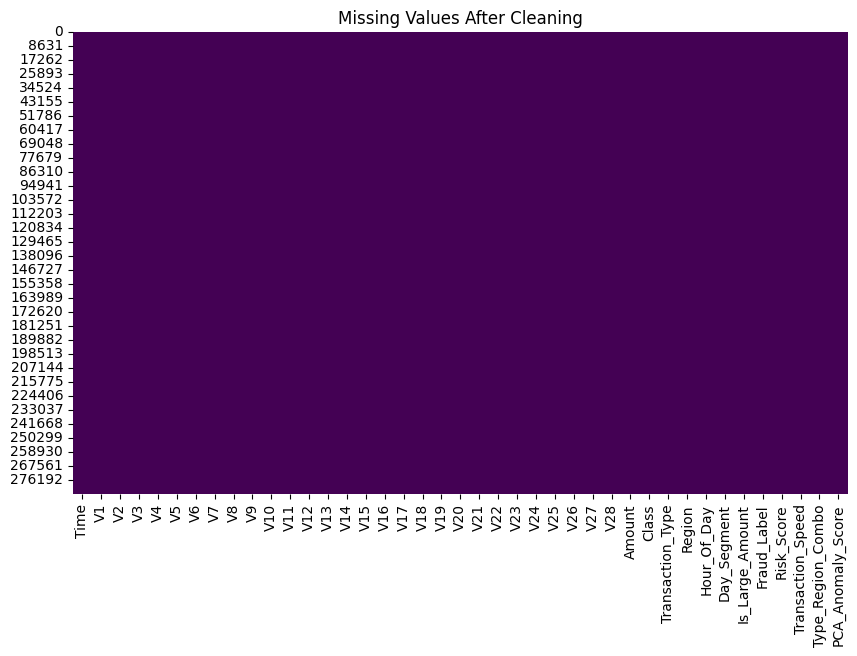

In [118]:
#If visualization is required

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap to visually confirm missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values After Cleaning")
plt.show()

 Step 3: Verify Data Types


1.   Identify Each Column’s Expected Type
2.   Spot Misclassified Columns
3. Standardize Formats
4. Ensure Tableau Compatibility
5.  Document Corrections



In [119]:
#Identify Each Column’s Expected Type
print(df.dtypes)

Time                 float64
V1                   float64
V2                   float64
V3                   float64
V4                   float64
V5                   float64
V6                   float64
V7                   float64
V8                   float64
V9                   float64
V10                  float64
V11                  float64
V12                  float64
V13                  float64
V14                  float64
V15                  float64
V16                  float64
V17                  float64
V18                  float64
V19                  float64
V20                  float64
V21                  float64
V22                  float64
V23                  float64
V24                  float64
V25                  float64
V26                  float64
V27                  float64
V28                  float64
Amount               float64
Class                  int64
Transaction_Type      object
Region                object
Hour_Of_Day          float64
Day_Segment   

In [120]:
#Spot Misclassified Columns
# Convert misclassified numeric columns from 'object' to proper types
numeric_columns = ['Risk_Score', 'Hour_Of_Day', 'Transaction_Speed', 'Amount', 'PCA_Anomaly_Score']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts safely

# Convert categorical variables properly
categorical_columns = ['Transaction_Type', 'Region', 'Day_Segment', 'Fraud_Label', 'Type_Region_Combo']
for col in categorical_columns:
    df[col] = df[col].astype('category')  # Ensures optimized storage

In [121]:
#Standardize Formats

df['Time'] = pd.to_datetime(df['Time'], errors='coerce')  # Converts to datetime

df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Time'].dt.day
df['Month'] = df['Time'].dt.month
df['Year'] = df['Time'].dt.year

In [122]:
#Clean Text Formatting in Categorical Columns

df['Transaction_Type'] = df['Transaction_Type'].str.strip()
df['Region'] = df['Region'].str.strip()
df['Day_Segment'] = df['Day_Segment'].str.strip()
df['Fraud_Label'] = df['Fraud_Label'].str.strip().str.lower()
df['Transaction_Type'] = df['Transaction_Type'].str.replace('_', ' ')  # Remove underscores

In [123]:
#Ensure Tableau Compatibility
df.rename(columns={
    'PCA_Anomaly_Score': 'Anomaly_Score',
    'Type_Region_Combo': 'Region_Type_Combo'
}, inplace=True)

df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)

In [124]:
#Document Corrections for Future Audits
corrections = {
    "Converted": numeric_columns,
    "Categorical_Corrected": categorical_columns,
    "Renamed": ['PCA_Anomaly_Score → Anomaly_Score', 'Type_Region_Combo → Region_Type_Combo'],
    "Text_Cleaned": ['Fraud_Label', 'Transaction_Type'],
    "Datetime_Extracted": ['Hour', 'Day', 'Month', 'Year']
}
correction_log = pd.DataFrame.from_dict(corrections, orient='index').transpose()
print(correction_log)

           Converted Categorical_Corrected  \
0         Risk_Score      Transaction_Type   
1        Hour_Of_Day                Region   
2  Transaction_Speed           Day_Segment   
3             Amount           Fraud_Label   
4  PCA_Anomaly_Score     Type_Region_Combo   

                                 Renamed      Text_Cleaned Datetime_Extracted  
0      PCA_Anomaly_Score → Anomaly_Score       Fraud_Label               Hour  
1  Type_Region_Combo → Region_Type_Combo  Transaction_Type                Day  
2                                   None              None              Month  
3                                   None              None               Year  
4                                   None              None               None  


In [125]:
#Save Cleaned Data for Tableau
df.to_csv("cleaned_data.csv", index=False)

 Step 4: Standardize Categorical Values

In [126]:
print(df.columns)  # Displays all column names


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Transaction_Type', 'Region', 'Hour_Of_Day', 'Day_Segment',
       'Is_Large_Amount', 'Fraud_Label', 'Risk_Score', 'Transaction_Speed',
       'Region_Type_Combo', 'Anomaly_Score', 'Hour', 'Day', 'Month', 'Year'],
      dtype='object')


In [127]:
#Normalize Text Formatting
for col in ['Transaction_Type', 'Region', 'Day_Segment', 'Fraud_Label', 'Region_Type_Combo']:
    if col in df.columns:  # Ensure column exists before modifying
        df[col] = df[col].str.strip().str.lower().str.replace('_', ' ')  # Normalize text formatting

In [128]:
#Unify Similar Categories
df['Transaction_Type'] = df['Transaction_Type'].replace({'type1': 'Type 1', 'type2': 'Type 2', 'type3': 'Type 3'})

In [129]:
#Convert Categories to Categorical Data Type
df['Transaction_Type'] = df['Transaction_Type'].astype('category')

In [130]:
#Create a Mapping Dictionary for Consistency
type_mapping = {
    'type1': 'Type 1',
    'type2': 'Type 2',
    'type3': 'Type 3'
}

Step 5: Outlier & Range Checks

In [131]:
# Define function to detect outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in key numerical columns
outlier_columns = ['Amount', 'Risk_Score', 'Transaction_Speed', 'Anomaly_Score']
for col in outlier_columns:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in Amount: 31904
Outliers in Risk_Score: 32001
Outliers in Transaction_Speed: 8912
Outliers in Anomaly_Score: 0


In [132]:
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [133]:
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [134]:
#Cap extreme values
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [135]:
#Flag outliers for later analysis
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[f"{col}_Outlier"] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

Step 6: Final Sanity Check

In [136]:
print(df.info())  # Check column types and missing values
print(df.describe())  # Summarize numerical columns
print(df.isnull().sum())  # Count remaining NaN values

<class 'pandas.core.frame.DataFrame'>
Index: 227353 entries, 1 to 284805
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Time                       227353 non-null  datetime64[ns]
 1   V1                         227353 non-null  float64       
 2   V2                         227353 non-null  float64       
 3   V3                         227353 non-null  float64       
 4   V4                         227353 non-null  float64       
 5   V5                         227353 non-null  float64       
 6   V6                         227353 non-null  float64       
 7   V7                         227353 non-null  float64       
 8   V8                         227353 non-null  float64       
 9   V9                         227353 non-null  float64       
 10  V10                        227353 non-null  float64       
 11  V11                        227353 non-null  float64      

In [137]:
print(df.isnull().sum())  # Count remaining NaN values

Time                         0
V1                           0
V2                           0
V3                           0
V4                           0
V5                           0
V6                           0
V7                           0
V8                           0
V9                           0
V10                          0
V11                          0
V12                          0
V13                          0
V14                          0
V15                          0
V16                          0
V17                          0
V18                          0
V19                          0
V20                          0
V21                          0
V22                          0
V23                          0
V24                          0
V25                          0
V26                          0
V27                          0
V28                          0
Amount                       0
Class                        0
Transaction_Type             0
Region  

Step 7: Rename Columns

In [138]:
df.rename(columns={
    'PCA_Anomaly_Score': 'Anomaly_Score',
    'Region_Type_Combo': 'Region_Classification'
}, inplace=True)

# Verify column names
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Transaction_Type', 'Region', 'Hour_Of_Day', 'Day_Segment',
       'Is_Large_Amount', 'Fraud_Label', 'Risk_Score', 'Transaction_Speed',
       'Region_Classification', 'Anomaly_Score', 'Hour', 'Day', 'Month',
       'Year', 'Amount_Outlier', 'Risk_Score_Outlier',
       'Transaction_Speed_Outlier', 'Anomaly_Score_Outlier'],
      dtype='object')


 Step 8: Reorder Columns

In [139]:
desired_order = ['Time', 'Transaction_Type', 'Region', 'Amount', 'Class', 'Risk_Score',
                 'Fraud_Label', 'Transaction_Speed', 'Anomaly_Score']
df = df[desired_order + [col for col in df.columns if col not in desired_order]]

# Verify order
print(df.head())

                           Time Transaction_Type    Region  Amount  Class  \
1 1970-01-01 00:00:00.000000000           type 3  region 5   2.690      0   
3 1970-01-01 00:00:00.000000001           type 1  region 2  94.375      0   
4 1970-01-01 00:00:00.000000002           type 3  region 6  69.990      0   
5 1970-01-01 00:00:00.000000002           type 1  region 2   3.670      0   
6 1970-01-01 00:00:00.000000004           type 2  region 3   4.990      0   

   Risk_Score Fraud_Label  Transaction_Speed  Anomaly_Score        V1  ...  \
1         4.0       legit                0.0      14.879686  1.191857  ...   
3       140.0       legit                0.0      57.153141 -0.966272  ...   
4       125.0       legit                1.0      38.508423 -1.158233  ...   
5         4.0       legit                0.0      65.250179 -0.425966  ...   
6         7.0       legit                2.0      82.828456  1.229658  ...   

   Is_Large_Amount  Region_Classification  Hour  Day  Month  Year  \

 Step 9: Export Final CSV

In [140]:
df.to_csv("/content/drive/MyDrive/Credit card dashboard/cleaned_creditcard.csv", index=False)
print("Final dataset exported successfully to: /content/drive/MyDrive/Credit card dashboard/cleaned_data.csv")

Final dataset exported successfully to: /content/drive/MyDrive/Credit card dashboard/cleaned_data.csv
